# 双缝干涉视频识别

## 1. 使用前

使用的是python3.7环境，第三方库可以通过以下指令下载：
````
pip install numpy
pip install pillow
pip install opencv-python
pip install matplotlib
````

In [7]:
import cv2
import os
from PIL import Image
import random
import numpy as np

# # 生成背景
# # 创建一个目录来存储图像（如果还没有的话）
# os.makedirs('images', exist_ok=True)

# # 打开视频文件
# cap = cv2.VideoCapture('test.mp4')

# # 获取视频总帧数
# total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# # 生成五个随机的帧数
# random_frames = random.sample(range(0, total_frames), 1000)

# # 对于每一帧
# for i, frame_no in enumerate(random_frames):

#     # 将视频定位到指定帧数
#     cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)

#     # 读取该帧
#     ret, frame = cap.read()

#     # 将OpenCV图像（BGR）转换为PIL图像（RGB）
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     image = Image.fromarray(frame)

#     # 旋转图像45度
#     image = image.rotate(-21)

#     # 保存图像
#     image.save(os.path.join('images', 'image{}.png'.format(i + 1)))

# # 释放VideoCapture
# cap.release()


In [8]:
import cv2
import os
from PIL import Image

# 生成原图像
# 创建一个目录来存储图像（如果还没有的话）
os.makedirs('images', exist_ok=True)

# 打开视频文件
cap = cv2.VideoCapture('test.mp4')

# 获取视频的帧率
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 初始化帧数计数器
frame_counter = 0

# 初始化秒数计数器
second_counter = 0

while True:
    # 读取下一帧
    ret, frame = cap.read()

    # 如果读取失败（例如已经到了视频的末尾），则退出循环
    if not ret:
        break

    # 如果当前帧数是帧率的整数倍，那么就保存当前帧
    if frame_counter % int(fps) == 0:
        # 将OpenCV图像（BGR）转换为PIL图像（RGB）
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(frame)

        # 旋转图像到正
        image = image.rotate(-25)

        # 保存图像
        image.save(os.path.join('images', f'{second_counter}_image_1.png'))

        second_counter += 1

    if frame_counter % int(fps) == 1:
        # 将OpenCV图像（BGR）转换为PIL图像（RGB）
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(frame)

        # 旋转图像到正
        image = image.rotate(-25)

        # 保存图像
        image.save(os.path.join('images', f'{second_counter}_image_2.png'))

    if frame_counter % int(fps) == 2:
        # 将OpenCV图像（BGR）转换为PIL图像（RGB）
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(frame)

        # 旋转图像到正
        image = image.rotate(-25)

        # 保存图像
        image.save(os.path.join('images', f'{second_counter}_image_3.png'))

    # 帧数计数器加一
    frame_counter += 1


# 释放VideoCapture
cap.release()


In [9]:
from PIL import Image
import numpy as np
import glob

# 图像文件路径的模式
image_files_pattern = 'images/*.png'

# 获取所有匹配的文件
image_files = glob.glob(image_files_pattern)

# 初始化一个数组来存储所有图像的像素值之和
sum_array = None

# 对于每一个文件
for image_file in image_files:

    # 打开图像并转换为灰度模式
    image = Image.open(image_file).convert('L')

    # 将图像转换为numpy数组，并转换数据类型为float
    image_array = np.array(image, dtype=float)

    # 如果sum_array还没有被初始化，那么就用当前图像的数组来初始化它
    if sum_array is None:
        sum_array = image_array
    else:
        # 否则，将当前图像的像素值加到sum_array中
        sum_array += image_array

# 计算平均像素值
average_array = sum_array / len(image_files)

# 将平均像素值转换为0-255范围内的无符号整数
average_array = np.clip(average_array, 0, 255).astype(np.uint8)

# 将结果转换回图像并保存
average_image = Image.fromarray(average_array)
average_image.save('background.jpg')


background_image = Image.open('background.jpg').convert('L')
background_array = np.array(background_image, dtype=float)

dirty_image = Image.open('dirty.png').convert('L')
dirty_array = np.array(background_image, dtype=float)


In [10]:
# 定义一个函数做噪声去除
def remove_noise(original_array):
    # 减去背景
    result_array = original_array - background_array - dirty_array

    # 将结果的数据类型转回无符号整数，并确保所有的值都在0-255范围内
    result_array = np.clip(result_array, 0, 255).astype(np.uint8)
    
    return result_array

In [11]:


from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from PIL import ImageEnhance
from skimage import filters, morphology, img_as_ubyte
from scipy import ndimage

# 打开图片并转换为灰度模式
image = Image.open('images/100_image_1.png').convert('L')

# 将图片转换为numpy数组
image_array = np.array(image, dtype=float)

image_arry = remove_noise(image_array)
new_image = Image.fromarray(np.uint8(image_array))
new_image.save('new_image2.png')
# 二值化处理
thresh = filters.threshold_otsu(image_array)
binary = gaussian_highpass > thresh

# 将numpy数组转换为图像并保存
new_image = Image.fromarray(img_as_ubyte(binary))
new_image.save('new_image1.png')

# 细化处理
thinned = morphology.thin(binary)

# 骨化处理
skeleton = morphology.skeletonize(thinned)

# 将numpy数组转换为图像并保存
new_image = Image.fromarray(img_as_ubyte(skeleton))
new_image.save('new_image.png')


# 计算每一列的平均亮度
average_brightness = image_array.mean(axis=0)


# 生成x坐标
x = np.arange(len(average_brightness))

# 生成波形图
plt.figure(figsize=(10, 6))
plt.plot(x, average_brightness)
plt.xlabel('横坐标',fontproperties=font)
plt.ylabel('平均亮度',fontproperties=font)
plt.title('明暗交替的双缝干涉实验图片扫描结果',fontproperties=font)
plt.show()


NameError: name 'gaussian_highpass' is not defined

## 平滑化，选取合适范围，统计波峰/波谷

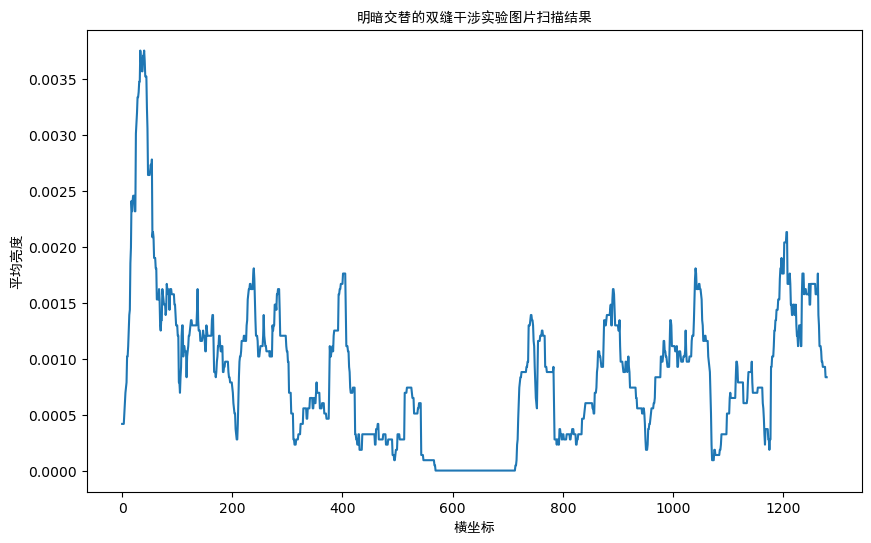

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font = FontProperties(fname='simhei.ttf')

# 打开图片并转换为灰度模式
image = Image.open('images/100_image_1.png').convert('L')

# 将图片转换为numpy数组
image_array = np.array(image,dtype=float)

# 去除噪声
image_array = remove_noise(image_array)

# 计算每一列的平均亮度
average_brightness = image_array.mean(axis=0)
# 定义窗口大小
window_size = 30

# 创建一个窗口，这是一个包含等于窗口大小的1的数组
window = np.ones(window_size) / window_size

# 使用numpy的convolve函数进行滑动平均
smoothed_brightness = np.convolve(average_brightness, window, mode='same')

# 生成x坐标
x = np.arange(len(smoothed_brightness))

# 生成波形图
plt.figure(figsize=(10, 6))
plt.plot(x, smoothed_brightness)
plt.xlabel('横坐标',fontproperties=font)
plt.ylabel('平均亮度',fontproperties=font)
plt.title('明暗交替的双缝干涉实验图片扫描结果',fontproperties=font)
plt.show()


In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# 打开图片并转换为灰度模式
image = Image.open('images/100_image_1.png').convert('L')

# 将图片转换为numpy数组
image_array = np.array(image, dtype=float)
# 去除噪声
image_array = remove_noise(image_array)
# 计算每一列的平均亮度
average_brightness = image_array.mean(axis=0)

# 定义窗口大小
window_size = 20

# 创建一个窗口，这是一个包含等于窗口大小的1的数组
window = np.ones(window_size) / window_size

# 使用numpy的convolve函数进行滑动平均
smoothed_brightness = np.convolve(average_brightness, window, mode='same')

# 使用scipy的argrelextrema函数找到所有的局部最小值
minima = argrelextrema(smoothed_brightness, np.less)

# minima是一个元组，我们需要第一个元素
minima = minima[0]

# 指定想要查看的横坐标区间
x_min, x_max = 390, 870

# 从所有的最小值中筛选出在指定横坐标区间内的最小值
minima_in_range = minima[(minima >= x_min) & (minima <= x_max)]

# 计数和记录最小值的坐标
num_minima = len(minima_in_range)
print('波谷数量:', num_minima)
print('波谷坐标:', minima_in_range)



波谷数量: 12
波谷坐标: [405 521 740 742 746 763 787 819 832 849 851 862]


In [14]:

import statistics
differences = []

for i in range(len(minima_in_range)-3):
    for j in range(i+1, i+3):
        diff = abs(minima_in_range[j] - minima_in_range[i])  # 计算差值的绝对值
        differences.append(diff)

differences.sort(reverse=True)  # 从大到小排序
# 计算众数和频率
mode = statistics.mode(differences)
frequency = differences.count(mode)

print("Mode:", mode)
print("Frequency:", frequency)

Mode: 17
Frequency: 2


In [15]:
import numpy as np
from scipy.signal import find_peaks

# 取出你感兴趣的那部分数据
start, end = 390, 870
data = smoothed_brightness[start:end]

# 使用find_peaks函数找到所有的波峰
peaks, _ = find_peaks(data)

# 打印波峰的数量
print("Number of peaks: ", len(peaks))


Number of peaks:  32


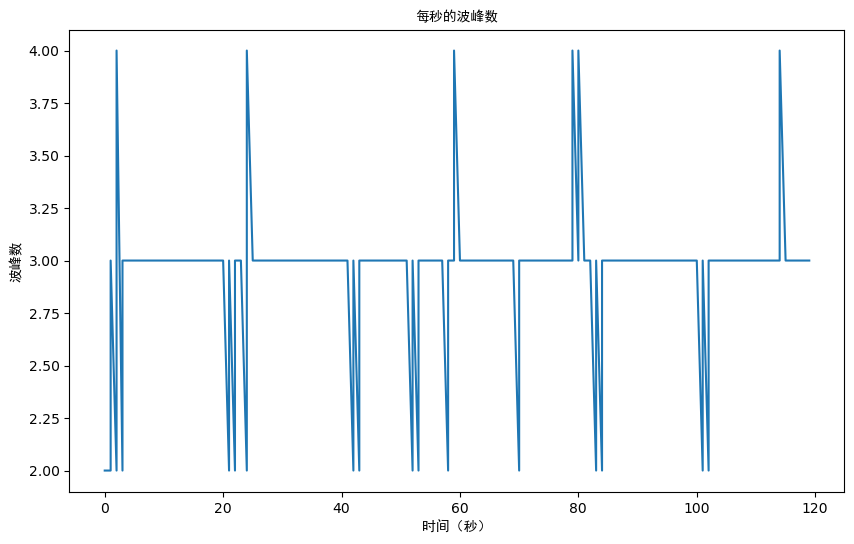

In [16]:
import os
import numpy as np
from PIL import Image
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 定义窗口大小
window_size = 15
# 创建一个窗口，这是一个包含等于窗口大小的1的数组
window = np.ones(window_size) / window_size

# 定义横坐标范围
start, end = 390, 870
start, end = 510, 650 # 缩小一半

# 用于存储结果的列表
seconds = []
peak_counts = []

# 遍历images文件夹中的所有图片
for filename in os.listdir('images'):
    # 打开图片并转换为灰度模式
    image = Image.open(os.path.join('images', filename)).convert('L')
    # 将图片转换为numpy数组
    image_array = np.array(image, dtype=float)
    # 去除噪声
    image_array = remove_noise(image_array)

    # 计算每一列的平均亮度
    average_brightness = image_array.mean(axis=0)

    # 使用numpy的convolve函数进行滑动平均
    smoothed_brightness = np.convolve(average_brightness, window, mode='same')

    # 取出你感兴趣的那部分数据
    data = smoothed_brightness[start:end]

    # 使用find_peaks函数找到所有的波峰
    peaks, _ = find_peaks(data)

    # 将结果添加到列表中
    # 文件名中的前部分是秒数，这里用split函数提取出来
    seconds.append(int(filename.split('_')[0]))
    peak_counts.append(len(peaks))

# 将结果按秒数排序（这一步是可选的，如果你的文件名已经是按秒数排序的，那么这一步就不需要了）
seconds, peak_counts = zip(*sorted(zip(seconds, peak_counts)))

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(seconds, peak_counts)
plt.xlabel('时间（秒）',fontproperties=font)
plt.ylabel('波峰数',fontproperties=font)
plt.title('每秒的波峰数',fontproperties=font)
plt.show()
